Estatística - Probabilidade e Amostragem 

Considerando a base de dados de populacao_brasileira.json responda as questões abaixo (os dados são fictícios).
Você é uma pesquisadora desenvolvendo uma análise sobre as características da força de trabalho nos estados brasileiros. Responda as perguntas abaixo:


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stat

In [2]:
populacao = pd.read_csv('populacao_brasileira.csv')

1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.


In [3]:
populacao.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [4]:
populacao.shape[0]

1000

In [5]:
populacao.columns

Index(['Unnamed: 0', 'estado', 'idade', 'escolaridade',
       'nível de proficiência em inglês', 'renda', 'sexo'],
      dtype='object')

In [6]:
populacao.drop('Unnamed: 0', axis='columns', inplace=True)

In [7]:
fluencia = ['Avançado']
fluencia_mask = populacao['nível de proficiência em inglês'].isin(fluencia)

In [8]:
populacao[fluencia_mask].shape[0]

344

In [9]:
probabilidade_fluencia = populacao[fluencia_mask].shape[0]/populacao.shape[0]

In [10]:
probabilidade_complementar_fluencia = 1 - probabilidade_fluencia
print(probabilidade_complementar_fluencia * 100)

65.60000000000001


2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?


In [11]:
AL_PA = ['AL', 'PA']
AL_PA_mask = populacao['estado'].isin(AL_PA)

In [12]:
populacao[AL_PA_mask].shape[0]

79

In [13]:
populacao[AL_PA_mask][populacao['renda'] > 5000.00].shape[0] #Quantidade de pessoas que são do AL ou PA, com renda superior a 5000.00

/tmp/ipykernel_15728/3926858937.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  populacao[AL_PA_mask][populacao['renda'] > 5000.00].shape[0] #Quantidade de pessoas que são do AL ou PA, com renda superior a 5000.00


4

In [14]:
probabilidade_ALPA_renda = (populacao[AL_PA_mask][populacao['renda'] > 5000.00].shape[0] / populacao[AL_PA_mask].shape[0]) * 100

/tmp/ipykernel_15728/1883281988.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  probabilidade_ALPA_renda = (populacao[AL_PA_mask][populacao['renda'] > 5000.00].shape[0] / populacao[AL_PA_mask].shape[0]) * 100


In [15]:
print(f'A probabilidade de uma pessoa do AL ou PA ter uma renda superior a 5 mil é de {probabilidade_ALPA_renda}%.')

A probabilidade de uma pessoa do AL ou PA ter uma renda superior a 5 mil é de 5.063291139240507%.


3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?


In [16]:
populacao_AM = populacao[populacao['estado'] == "AM"]

In [17]:
populacao_AM

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
2,AM,32,Fundamental,Intermediário,3835.69,M
5,AM,38,Fundamental,Avançado,4441.57,F
13,AM,57,Médio,Básico,2844.32,M
23,AM,38,Médio,Intermediário,5075.40,M
45,AM,31,Pós-graduação,Básico,5270.69,F
54,AM,25,Superior,Intermediário,3478.98,M
97,AM,41,Superior,Intermediário,1345.14,F
149,AM,21,Superior,Básico,2625.18,F
195,AM,49,Fundamental,Básico,1297.42,M
230,AM,33,Pós-graduação,Intermediário,2373.03,M


In [18]:
superior_pos = ["Superior", "Pós-graduação"]

In [19]:
superior_pos_mask = populacao_AM['escolaridade'].isin(superior_pos)

In [20]:
populacao_AM[superior_pos_mask]

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
45,AM,31,Pós-graduação,Básico,5270.69,F
54,AM,25,Superior,Intermediário,3478.98,M
97,AM,41,Superior,Intermediário,1345.14,F
149,AM,21,Superior,Básico,2625.18,F
230,AM,33,Pós-graduação,Intermediário,2373.03,M
330,AM,21,Pós-graduação,Avançado,3658.54,M
344,AM,63,Pós-graduação,Básico,2510.56,F
407,AM,60,Pós-graduação,Intermediário,1929.92,F
423,AM,33,Pós-graduação,Intermediário,4329.15,F
425,AM,59,Pós-graduação,Intermediário,3709.00,F


In [21]:
probabilidade_AM_superior = populacao_AM[superior_pos_mask].shape[0] / populacao_AM.shape[0]
print(f' A probabilidade de uma pessoa do Amazonas ter ensino superior ou pós é {probabilidade_AM_superior * 100} %')

 A probabilidade de uma pessoa do Amazonas ter ensino superior ou pós é 55.26315789473685 %


In [22]:
probabilidade_complementar_AM_superior = 1 - probabilidade_AM_superior

In [23]:
probabilidade_AM_quinta_pessoa = probabilidade_complementar_AM_superior * probabilidade_complementar_AM_superior * probabilidade_complementar_AM_superior * probabilidade_complementar_AM_superior * probabilidade_AM_superior

In [24]:
print(f'A probabilidade da quinta pessoa do AM ter ensino superior ou pós é de {probabilidade_AM_quinta_pessoa * 100}%.')

A probabilidade da quinta pessoa do AM ter ensino superior ou pós é de 2.2135890467222827%.


4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?


In [25]:
populacao['renda'].describe()

count    1000.000000
mean     3082.537180
std       996.572239
min       103.740000
25%      2425.815000
50%      3076.415000
75%      3714.487500
max      5632.380000
Name: renda, dtype: float64

In [26]:
ranges = [0, 1500.00, 3000.00, 4500.00, 6000.00]

In [27]:
populacao.groupby(pd.cut(populacao['renda'], ranges)).count()

/tmp/ipykernel_15728/1424291042.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  populacao.groupby(pd.cut(populacao['renda'], ranges)).count()


,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
renda,,,,,,
"(0.0, 1500.0]",55,55,55,55,55,55
"(1500.0, 3000.0]",414,414,414,414,414,414
"(3000.0, 4500.0]",442,442,442,442,442,442
"(4500.0, 6000.0]",89,89,89,89,89,89


5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.


In [28]:
populacao['renda'].describe()

count    1000.000000
mean     3082.537180
std       996.572239
min       103.740000
25%      2425.815000
50%      3076.415000
75%      3714.487500
max      5632.380000
Name: renda, dtype: float64

In [29]:
variancia = populacao['renda'].var()
print(variancia)

993156.2281676152


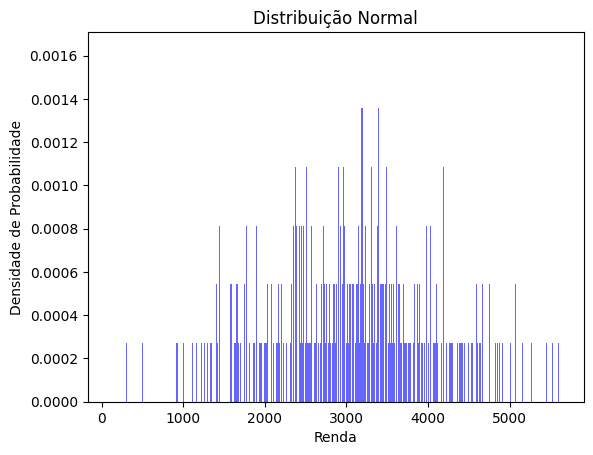

In [30]:
# Plotando o histograma dos dados
plt.hist(populacao['renda'], bins=1500, density=True, alpha=0.6, color='blue')

# Plotando a função de densidade de probabilidade

plt.title('Distribuição Normal')
plt.xlabel('Renda')
plt.ylabel('Densidade de Probabilidade')
plt.show()

6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?


In [31]:
pos_grad = ["Pós-graduação"]
pos_grad_mask = populacao['escolaridade'].isin(pos_grad)

In [36]:
populacao[pos_grad_mask].shape[0]

253

In [37]:
probabilidade_pos_grad = populacao[pos_grad_mask].shape[0] / populacao.shape[0]
print(probabilidade_pos_grad)

0.253


In [38]:
print(f"A probabilidade de alguém ter pós graduação na amostra original é de {probabilidade_pos_grad * 100}%.")

A probabilidade de alguém ter pós graduação na amostra original é de 25.3%.


In [39]:
nova_amostra = 1000000
print(f"Em uma amostra com 1 milhão de pessoas, a probabilidade é de {probabilidade_pos_grad * nova_amostra} pessoas terem pós graduação.")

Em uma amostra com 1 milhão de pessoas, a probabilidade é de 253000.0 pessoas terem pós graduação.


7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.


In [40]:
populacao.groupby(['escolaridade']).count()

,estado,idade,nível de proficiência em inglês,renda,sexo
escolaridade,,,,,
Fundamental,266,266,266,266,266
Médio,238,238,238,238,238
Pós-graduação,253,253,253,253,253
Superior,243,243,243,243,243


In [41]:
populacao.groupby(['escolaridade']).count().cumsum()

,estado,idade,nível de proficiência em inglês,renda,sexo
escolaridade,,,,,
Fundamental,266,266,266,266,266
Médio,504,504,504,504,504
Pós-graduação,757,757,757,757,757
Superior,1000,1000,1000,1000,1000


8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês
intermediário?


In [42]:
fluencia_int = ['Intermediário']
fluencia_int_mask = populacao['nível de proficiência em inglês'].isin(fluencia_int)

In [43]:
populacao[fluencia_int_mask].shape[0]

329

In [44]:
prob_fluencia_int = populacao[fluencia_int_mask].shape[0] / populacao.shape[0]

In [45]:
prob_complementar_fluencia_int = 1 - populacao[fluencia_int_mask].shape[0] / populacao.shape[0]

In [46]:
print(prob_complementar_fluencia_int)

0.671


In [47]:
margem_erro = (1.96 * np.sqrt((prob_fluencia_int * prob_complementar_fluencia_int) / 1000)) * 100
print(f'A margem de erro amostral da população ter nível de inglês intermediário é de {margem_erro}%.')

A margem de erro amostral da população ter nível de inglês intermediário é de 2.912160322509734%.


9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?


In [48]:
populacao['renda'].describe()

count    1000.000000
mean     3082.537180
std       996.572239
min       103.740000
25%      2425.815000
50%      3076.415000
75%      3714.487500
max      5632.380000
Name: renda, dtype: float64

In [49]:
renda_acima = populacao[populacao['renda'] > 4082.54].shape[0]

In [50]:
print(f'A probabilidade de encontrar alguém com renda acima de 4082.54 é de {renda_acima / populacao.shape[0] * 100}%.')

A probabilidade de encontrar alguém com renda acima de 4082.54 é de 16.1%.


10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês? 

In [51]:
sudeste = ['RJ', 'SP', 'MG', 'ES']
populacao_sudeste_mask = populacao['estado'].isin(sudeste)

In [52]:
qtd_sudeste = populacao[populacao_sudeste_mask].shape[0]

In [53]:
qtd_homem = populacao[populacao['sexo'] == "M"].shape[0]

In [54]:
qtd_fundamental = populacao[populacao['escolaridade'] == "Fundamental"].shape[0]

In [55]:
qtd_renda_doismil = populacao[populacao['renda'] > 2000.00].shape[0]

In [56]:
prob_sudeste = qtd_sudeste / 1000
prob_homem = qtd_homem / 1000
prob_fundamental = qtd_fundamental / 1000
prob_renda_doismil = qtd_renda_doismil / 1000

In [57]:
prob_final = prob_sudeste * prob_homem * prob_fundamental * prob_renda_doismil

In [58]:
print(f'A probabilidade de encontrar uma pessoa com essas características é de {prob_final * 100}%.')

A probabilidade de encontrar uma pessoa com essas características é de 1.7414252856%.


In [59]:
populacao.head()

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M
